<a href="https://colab.research.google.com/github/aldojda/BigData/blob/main/Practica_1_Paralelizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 1: Paralelizacion.

* Parte 1: Investigar sobre las lazy variables y como se usa el Delay para problemas mas grandes.


Las "Lazy Variables" son variables cuyos valores se calculan sólo cuando son necesarios en lugar de calcularse de inmediato cuando son declaradas (Asignadas), esto suele ser útil cuando el costo de calcular algún valor en terminos de tiempo o memoria sea muy grande.

El uso del Delay está relacionada con las "lazy variable"  para abordar problemas de memoria cuando se trata de conjuntos de datos grandes. en lugar de cargar todos los datos en la memoria de una vez  este permite cargar los datos gradualmente a medida que se necesiten.


*  Parte 2: Generen varias funciones y construyan un grafo de paralelización con al menos 4 cuellos de botella.



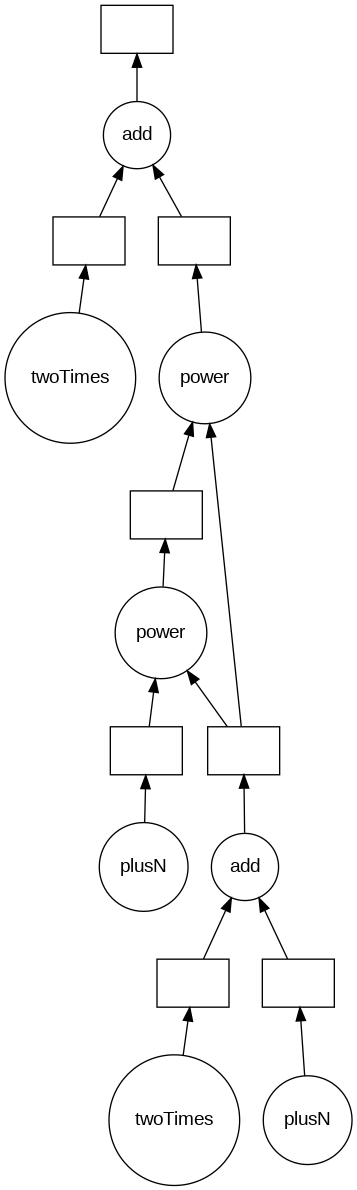

In [1]:
import dask

@dask.delayed
def twoTimes(i):
  return 2*i

@dask.delayed
def plusN(j, n):
  return j + n

@dask.delayed
def add(x, y):
  return x + y

@dask.delayed
def power(x, y):
  return a**b

#proceso
x = twoTimes(1)
y = plusN(5,2)
#bottle neck
z = add(x, y)
a = 5
b = plusN(5,2)
#bottleneck 2
c = power(b,z) 

#bottleneck 3
d =  power(z,c)

i = twoTimes(55)
#bottleneck
j = add(i,d)

j.visualize()


Extra challenge: Buscar ensemble learning en Scikit learn, utilizar minimo 3 algoritmos de machine learning para crear un modelo paralelo basado en un ensamble. Generar uno con dask y otro con la libreria de ensemble de sklearn, y comparar resultados. 

In [19]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
ensemble_classifier = VotingClassifier( estimators=[('rf', rf), ('gb', gb), ('et', et)], voting='hard')

In [24]:
%%time
ensemble_classifier.fit(X_train, y_train)
y_pred = ensemble_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667
CPU times: user 568 ms, sys: 795 µs, total: 569 ms
Wall time: 578 ms


In [25]:
%%time
with client:
    ensemble_classifier.fit(X_train, y_train)
y_pred = ensemble_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667
CPU times: user 872 ms, sys: 3.14 ms, total: 875 ms
Wall time: 976 ms
